# Dataset
## Comments with multiple characteristics


In this notebook we will check comments having multiple characteristics

In [3]:
%load_ext autoreload
%autoreload 2
import json

with open("../../output/dataset.json") as f:
    articles = json.load(f)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

characteristics = [
    'WOMEN',
    'LGBTI',
    'RACISM',
    'CLASS',
    'POLITICS',
    'DISABLED',
    'APPEARANCE',
    'CRIMINAL'
]

df = pd.DataFrame([
    {   
        **{"context": art["tweet_text"]},
        **comm,
    }
    for art in articles
    for comm in art["comments"]
]).set_index("id")

df["num_chars"] = df[characteristics].sum(axis=1)


df.loc[(df["num_chars"] > 0), "num_chars"].value_counts()
#plt.semilogy()

1    6777
2    1718
3     199
4      20
5       1
Name: num_chars, dtype: int64

In [29]:
pd.options.display.max_colwidth = 240
pd.options.display.max_rows = 240
df[df["num_chars"] >= 3][["context", "text"] + characteristics]

,context,text,WOMEN,LGBTI,RACISM,CLASS,POLITICS,DISABLED,APPEARANCE,CRIMINAL
id,,,,,,,,,,
327941,Coronavirus en Argentina: Cristina Kirchner vuelve de Cuba junto a su hija Florencia y permanecerá aislada por 14 días https://t.co/ltgNhDGTlZ,"@usuario Tendrían q ir directamente a la cárcel de Ezeiza. Por Truchas, chorras y fieras! 🤮",1,0,0,0,1,0,1,0
353477,"Ricardo Alfonsín le respondió a Luis Brandoni: ""¿Qué sabe lo que mamé yo de chico?"" https://t.co/Ngs5ejLHOp","@usuario Dejalo hablar a @usuario esta viejito y no sabe lo que dice. Encima lo dice enfrente de la mariquita de Morales Sola, ese que se la pasa sentado en el lobby del Kavanagh en rob de chambre, y con una copa de cognac en la mano. \...",0,1,0,0,0,1,1,0
373557,"Son venezolanos, vinieron a la Argentina en busca de una vida mejor y ahora se quieren ir: “Esto ya lo vimos” | Por Camila Hernández Otaño https://t.co/I80EolLrc1",@usuario Y...son gusanos,0,0,1,1,1,0,0,0
377302,"De la pareja a la “trieja”: tienen una relación de a tres y comparten casa, sexo, cama y proyectos de vida | Por Gisele Sousa Dias\nhttps://t.co/hCFycsJIja",@usuario La gente normal no nos mezclamos en estas idioteces de mermados adictos a las drogas. Lo más divertido son las pseudo-periodistas rascas que de una perversión hacen una nota para decir que eso es virtuoso. Los cóndores tienen m...,0,1,0,0,0,1,1,0
334718,Jimena Barón y una profunda reflexión: “Si fuera hombre sería alto macho” https://t.co/9HSvFmbCjf,@usuario Pensé que lo eras. \nLos travas también se ponen t3tas.,1,1,0,0,0,0,1,0
334730,Jimena Barón y una profunda reflexión: “Si fuera hombre sería alto macho” https://t.co/9HSvFmbCjf,@usuario Fea y con cara de macho. Algo tiene al menos ahora,1,1,0,0,0,0,1,0
334735,Jimena Barón y una profunda reflexión: “Si fuera hombre sería alto macho” https://t.co/9HSvFmbCjf,"@usuario Sin maquillaje, alto travesti.",1,1,0,0,0,0,1,0
334744,Jimena Barón y una profunda reflexión: “Si fuera hombre sería alto macho” https://t.co/9HSvFmbCjf,"@usuario No te hace falta mucho, con un solo corte lo sos",1,1,0,0,0,0,1,0
344968,"""El pico del coronavirus se está ralentizando"", dijo Ginés González García https://t.co/SNfXXt6VqS https://t.co/TudlVxVp8O",@usuario tarado integral inútil chorro borracho incompetente genuflexo atolondrado pelele mentiroso tergiversador........hubiese puesto peronista y me ahorraba todos lo demás!,0,0,0,0,1,1,1,0


## Heatmap

In [53]:
multiple = df[df["num_chars"] > 1]

multiple[characteristics]

heatmap = pd.DataFrame(index=characteristics, columns=characteristics).fillna(0)




for idx, row in multiple[characteristics].iterrows():

    offended_chars = row.index[row > 0]
    # Perdón Guido
    for i in range(len(offended_chars)):
        first_char = offended_chars[i]
        for j in range(i+1, len(offended_chars)):
            second_char = offended_chars[j]
            
            heatmap.loc[first_char, second_char] += 1
            heatmap.loc[second_char, first_char] += 1



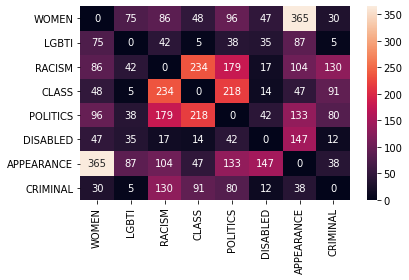

In [60]:

import seaborn as sns

sns.heatmap(heatmap, annot=True, fmt="d")
plt.tight_layout()
plt.savefig("../figures/heatmap_characteristics.pdf")